# Implementation of Reinforcement Learning in Taxi Game



Importing important libraries

In [ ]:
import tensorflow as tf
import gym # openAi gym
from gym import envs
import numpy as np 
import pandas as pd 

Reinforcement Learning Model

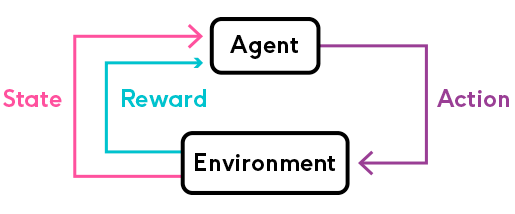

Building the Taxi Game from OpenAI Gym

In [ ]:
env = gym.make('Taxi-v3')
env.reset() #Resets the environment back to its initial state
env.render() 

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



- Blue: Passenger Pickup (Y)
- Purple : Destination (R)
- Yellow: Empty taxi
- Green: Full Taxi
- other letters:Possible Locations

Markov Decision Process-States


In [ ]:
print(env.observation_space)
print()
env.env.s=29 #Random State
env.render()
env.env.s = 200 #Random State
env.render()

Discrete(500)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



Markov Decision Process-Action

Possible Actions 
0: move south
1: move north
2: move east
3: move west
4: pickup passenger
5: dropoff passenger

In [ ]:
print(env.action_space)
NUM_ACTIONS = env.action_space.n
print("Possible actions: [0..%a]" % (NUM_ACTIONS-1))

Discrete(6)
Possible actions: [0..5]


Printing some random Steps

In [ ]:
rew_tot=0
obs= env.reset()
env.render()
for _ in range(6):
    action = env.action_space.sample() #take step using random action from possible actions (actio_space)
    obs, rew, done, info = env.step(action) 
    rew_tot = rew_tot + rew
    env.render()
#Print the reward of these random action
print("Reward: %r" % rew_tot) 

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
Reward: -24


Value Iteration Algorithm 

In [ ]:
NUM_ACTIONS = env.action_space.n #assigning action
NUM_STATES = env.observation_space.n #assigning state
V = np.zeros([NUM_STATES]) # The Value for each state
Pi = np.zeros([NUM_STATES], dtype=int)  # policy
gamma = 0.9 # discount factor
significant_improvement = 0.01

def best_action_value(s):
    # to find the highest value action (max_a) in state s
    best_a = None
    best_value = float('-inf') # negative infinity

    # Adding a loop to run in all possible actions to find the best current action
    for a in range (0, NUM_ACTIONS):
        env.env.s = s
        s_new, rew, done, info = env.step(a) #take the action
        v = rew + gamma * V[s_new]
        if v > best_value:
            best_value = v
            best_a = a
    return best_a

iteration = 0 #intializing
while True:
    # biggest_change is referred to by the mathematical symbol delta in equations
    biggest_change = 0
    for s in range (0, NUM_STATES):
        old_v = V[s]
        action = best_action_value(s) #choosing an action with the highest future reward
        env.env.s = s # goto the state
        s_new, rew, done, info = env.step(action) #take the action
        V[s] = rew + gamma * V[s_new] #Update Value for the state using Bellman equation
        Pi[s] = action
        biggest_change = max(biggest_change, np.abs(old_v - V[s]))
    iteration += 1
    if biggest_change < significant_improvement:
        print (iteration,' iterations done')
        break

41  iterations done


Implementing the algorithm in Taxi game

In [ ]:
rew_tot=0
obs= env.reset()
env.render()
done=False
while done != True: 
    action = Pi[obs]
    obs, rew, done, info = env.step(action) #take step using selected action
    rew_tot = rew_tot + rew
    env.render()
#Print the reward of these actions
print("Reward: %r" % rew_tot) 

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Reward: 14


Applying Q-Learning algorithm to taxi game

In [ ]:
NUM_ACTIONS = env.action_space.n
NUM_STATES = env.observation_space.n
Q = np.zeros([NUM_STATES, NUM_ACTIONS]) #Assiging
gamma = 0.9 # discount factor
alpha = 0.9 # learning rate
for episode in range(1,1001):
    done = False
    rew_tot = 0
    obs = env.reset()
    while done != True:
            action = np.argmax(Q[obs]) #choosing the action with the highest Q value 
            obs2, rew, done, info = env.step(action) #take the action
            Q[obs,action] += alpha * (rew + gamma * np.max(Q[obs2]) - Q[obs,action]) #Update Q-marix using Bellman equation
            rew_tot = rew_tot + rew
            obs = obs2   
    if episode % 50 == 0:
        print('Episode {} Total Reward: {}'.format(episode,rew_tot))


Episode 50 Total Reward: -95
Episode 100 Total Reward: -31
Episode 150 Total Reward: -15
Episode 200 Total Reward: 1
Episode 250 Total Reward: -13
Episode 300 Total Reward: 5
Episode 350 Total Reward: 13
Episode 400 Total Reward: 8
Episode 450 Total Reward: 8
Episode 500 Total Reward: 11
Episode 550 Total Reward: 10
Episode 600 Total Reward: 11
Episode 650 Total Reward: 6
Episode 700 Total Reward: 7
Episode 750 Total Reward: 7
Episode 800 Total Reward: 10
Episode 850 Total Reward: 7
Episode 900 Total Reward: 7
Episode 950 Total Reward: 7
Episode 1000 Total Reward: 7


After the implementation of Q learning,the agent is geting more positive rewards afterwards(300 episodes)